# Covid Risk Factors Regression Analysis

In [1]:
# Import dependencies

import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
# Import dataset

df = pd.read_csv('../Data/clean_data.csv')
df

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn,month,inpatient__occupancy,percent_of_inpatients_with_covid
0,2020/11/14,2020/11/10,2020/11/10,Laboratory-confirmed case,1.0,10 - 19 Years,Black,0.0,0.0,0.0,0.0,11,0.688734,0.151200
1,2020/11/19,2020/11/10,2020/11/09,Laboratory-confirmed case,1.0,10 - 19 Years,Black,0.0,0.0,0.0,0.0,11,0.688734,0.151200
2,2020/11/13,2020/11/10,2020/11/10,Laboratory-confirmed case,1.0,10 - 19 Years,Black,0.0,0.0,0.0,1.0,11,0.688734,0.151200
3,2020/11/09,2020/11/10,2020/11/09,Laboratory-confirmed case,1.0,10 - 19 Years,Black,0.0,0.0,0.0,0.0,11,0.688734,0.151200
4,2020/11/06,2020/11/10,2020/11/06,Laboratory-confirmed case,1.0,10 - 19 Years,Black,0.0,0.0,0.0,1.0,11,0.688734,0.151200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457726,2020/02/17,2020/03/30,2020/02/17,Laboratory-confirmed case,0.0,20 - 29 Years,Hispanic,0.0,0.0,0.0,1.0,2,0.461779,0.004861
457727,2020/02/29,2020/03/30,2020/02/29,Laboratory-confirmed case,0.0,20 - 29 Years,Hispanic,1.0,1.0,0.0,0.0,2,0.461779,0.004861
457728,2020/02/29,2020/04/08,2020/02/29,Laboratory-confirmed case,1.0,20 - 29 Years,Hispanic,0.0,0.0,0.0,0.0,2,0.461779,0.004861
457729,2020/02/11,2020/07/10,2020/02/11,Laboratory-confirmed case,0.0,60 - 69 Years,White,0.0,0.0,0.0,0.0,2,0.461779,0.004861


## Dummy Variable Classification
Dummy variables are a great way to let the regression software do the heavy lifting in the analysis of causal factors 

The underlying math is actually the same as a groupby average, but it gives our results in terms of regression coefficients, so we can very easily use them to estimate the future

https://conjointly.com/kb/dummy-variables/

In [3]:
# pandas.get_dummies is custom-built for this

# Age:
ageDummies = pd.get_dummies(df['age_group'])
df = pd.merge(df, ageDummies, left_index=True, right_index=True)

# Ethnicity:
ethnoDummies = pd.get_dummies(df['Race and ethnicity (combined)'])
df = pd.merge(df, ethnoDummies, left_index=True, right_index= True)

df


,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,...,60 - 69 Years,70 - 79 Years,80+ Years,Asian,Black,Hispanic,Native,Other,Pacific Islander,White
0,2020/11/14,2020/11/10,2020/11/10,Laboratory-confirmed case,1.0,10 - 19 Years,Black,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
1,2020/11/19,2020/11/10,2020/11/09,Laboratory-confirmed case,1.0,10 - 19 Years,Black,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
2,2020/11/13,2020/11/10,2020/11/10,Laboratory-confirmed case,1.0,10 - 19 Years,Black,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
3,2020/11/09,2020/11/10,2020/11/09,Laboratory-confirmed case,1.0,10 - 19 Years,Black,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
4,2020/11/06,2020/11/10,2020/11/06,Laboratory-confirmed case,1.0,10 - 19 Years,Black,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457726,2020/02/17,2020/03/30,2020/02/17,Laboratory-confirmed case,0.0,20 - 29 Years,Hispanic,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
457727,2020/02/29,2020/03/30,2020/02/29,Laboratory-confirmed case,0.0,20 - 29 Years,Hispanic,1.0,1.0,0.0,...,0,0,0,0,0,1,0,0,0,0
457728,2020/02/29,2020/04/08,2020/02/29,Laboratory-confirmed case,1.0,20 - 29 Years,Hispanic,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
457729,2020/02/11,2020/07/10,2020/02/11,Laboratory-confirmed case,0.0,60 - 69 Years,White,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1


In [4]:
#REGRESSION: LINEAR PROBABILITY MODEL

# Define input variables
x = df[['sex', 'medcond_yn', '0 - 9 Years', '10 - 19 Years', '20 - 29 Years',
       '30 - 39 Years', '40 - 49 Years', '50 - 59 Years', '60 - 69 Years',
       '70 - 79 Years', '80+ Years', 'Native', 'Asian','Black', 'Hispanic',
       'Other','Pacific Islander','White']]
x = sm.add_constant(x)
# Avoid perfect multicollinearity (comment out these two lines and you'll see that it breaks the regression)
del x['0 - 9 Years']
del x['White']

# Define output variable (death)
y = df['death_yn']

# Ordinary Least Squares Regression
model = sm.OLS(y, x, hasconst= True)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               death_yn   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     7084.
Date:                Wed, 16 Dec 2020   Prob (F-statistic):               0.00
Time:                        14:00:48   Log-Likelihood:                 46320.
No. Observations:              457731   AIC:                        -9.261e+04
Df Residuals:                  457714   BIC:                        -9.242e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0467      0.002    -24.540      0.000      -0.050      -0.043
sex                  0.0273      0.001     42.026      0.000       0.026       0.029
medcond_yn           0.0389      0.001     54.978      0.000       0.037       0.040
10 - 19 Years        0.0062      0.002      2.945      0.003       0.002       0.010
20 - 29 Years        0.0066      0.002      3.340      0.001       0.003       0.011
30 - 39 Years        0.0060      0.002      2.981      0.003       0.002       0.010
40 - 49 Years        0.0126      0.002      6.228      0.000       0.009       0.017
50 - 59 Years        0.0364      0.002     18.039      0.000       0.032       0.040
60 - 69 Years        0.0953      0.002     45.980      0.000       0.091       0.099
70 - 79 Years        0.1989      0.002     90.320      0.000       0.195       0.203
80+ Years            0.3986      0.002    172.865      0.000       0.394       0.403
Native               0.0472      0.005      8.724      0.000       0.037       0.058
Asian                0.0556      0.002     28.811      0.000       0.052       0.059
Black                0.0534      0.001     52.091      0.000       0.051       0.055
Hispanic             0.0321      0.001     38.707      0.000       0.030       0.034
Other                0.0241      0.002     12.488      0.000       0.020       0.028
Pacific Islander     0.0186      0.004      4.355      0.000       0.010       0.027
==============================================================================
Omnibus:                   245982.295   Durbin-Watson:                   1.698
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1778601.568
Skew:                           2.551   Prob(JB):                         0.00
Kurtosis:                      11.199   Cond. No.                         23.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Regressing Death: Results
Takeaways:
- Men are 2.45% more likely to die than women (all else equal)
- Those with a medical condition are 3.68% more likely to die than those without (all else equal)
- Age's effect on the likelihood of death is shown in fig. 1
- Ethnicity's effect is shown in fig. 2
 
This is a very promising Linear Probability model. Every single one of our variables has a p-value of 0, meaning our variables are significant. We have quantified many of the risk factors.

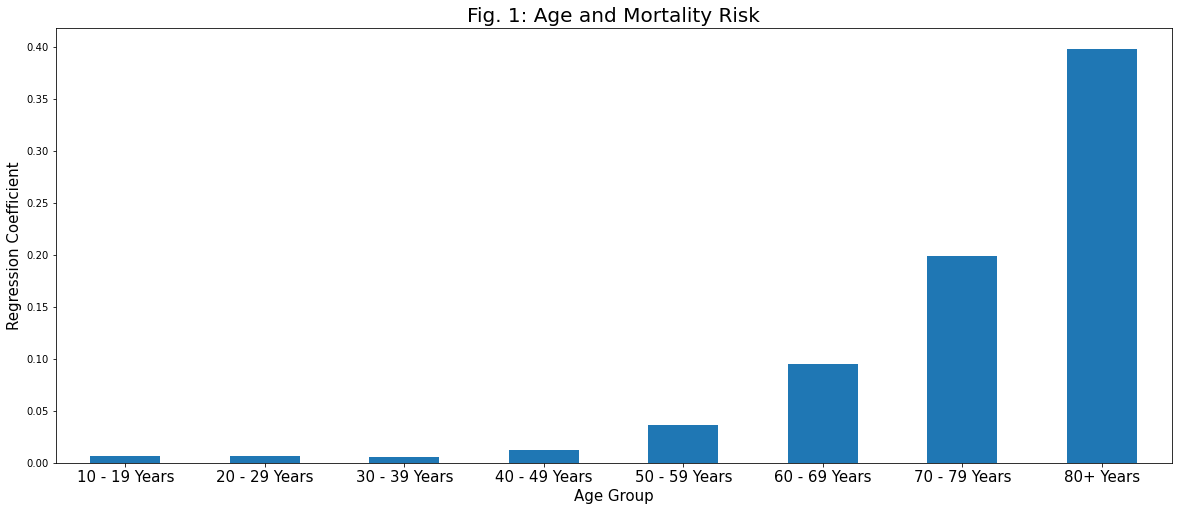

In [5]:
#Figure 1 calculation

plt.figure(figsize = (20,8))
plt.ylabel('Regression Coefficient', fontsize = 15)
plt.xlabel('Age Group', fontsize = 15)
res.params.loc['10 - 19 Years': '80+ Years'].plot(kind = 'bar')
plt.xticks(rotation = 0, fontsize= 15)
plt.title('Fig. 1: Age and Mortality Risk', fontsize = 20)
plt.savefig('../Images/Regression/fig1_age.png', facecolor = 'white')
plt.show()


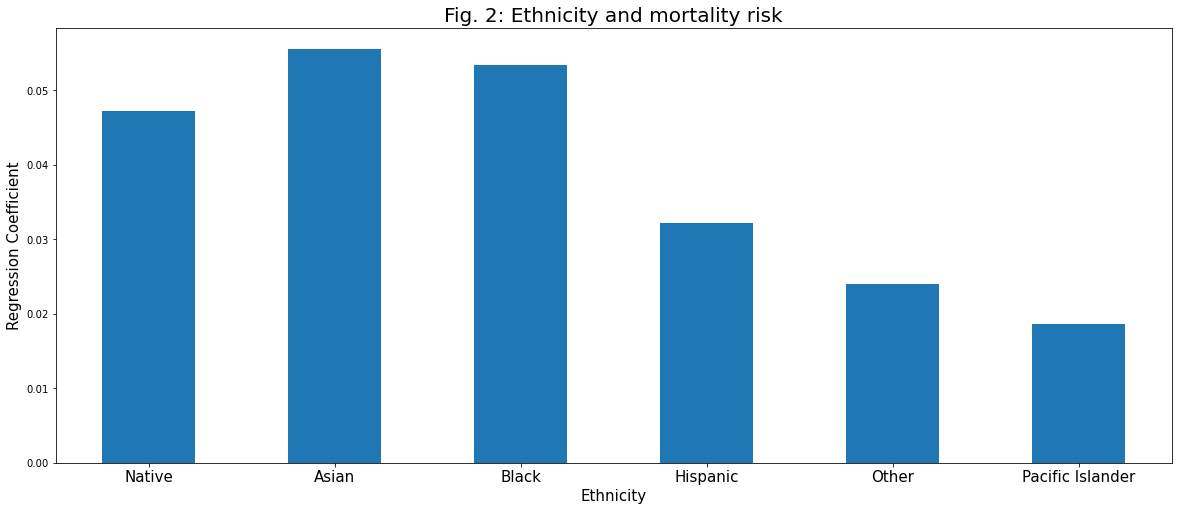

In [6]:
# Figure 2 calculations

plt.figure(figsize = (20,8))
plt.title('Fig. 2: Ethnicity and mortality risk', fontsize = 20)
plt.ylabel('Regression Coefficient', fontsize = 15)
plt.xlabel('Ethnicity', fontsize = 15)

res.params.loc['Native': 'Pacific Islander'].plot(kind = 'bar', )
plt.xticks(rotation = 0, fontsize= 15)
plt.savefig('../Images/Regression/fig2_ethnicity.png', facecolor = 'white')
plt.show()

# Predicting Death
So we have demonstrated strong correlation, but what about predictive power? What do our predicted probabilities of death look like when compared with the actual results?

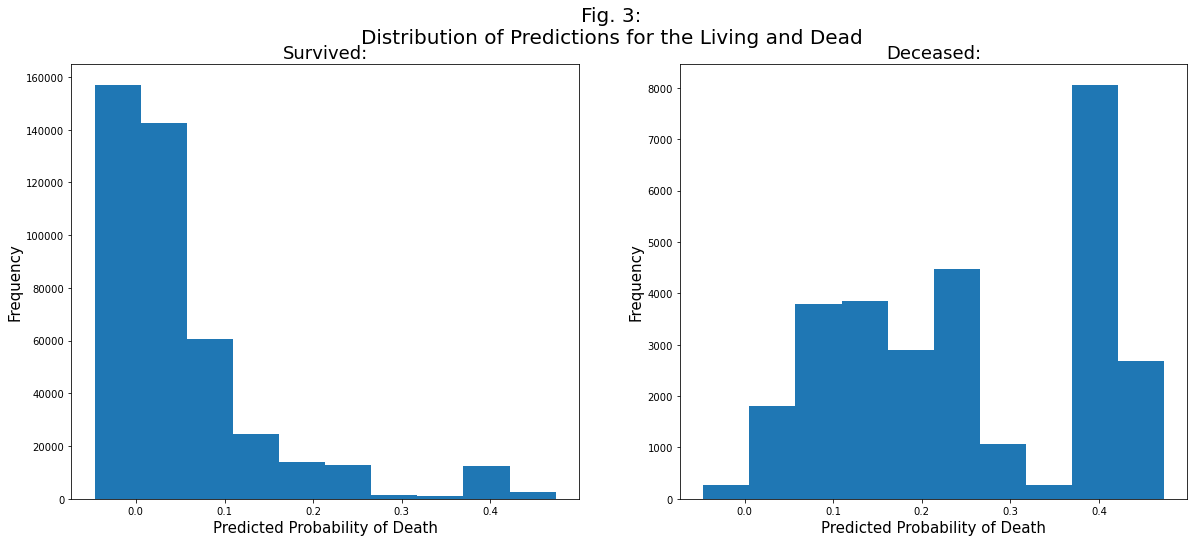

In [7]:
# Generate predictions
df['LPM Prediction'] = res.predict(x)

predictions = df[['LPM Prediction', 'death_yn']]

deaths = predictions[predictions['death_yn'] == True]
lives = predictions[predictions['death_yn'] == False]

fig, axs = plt.subplots(1, 2, figsize = (20,8))
fig.suptitle('Fig. 3:\nDistribution of Predictions for the Living and Dead', fontsize= 20)
axs[0].hist(lives['LPM Prediction'])
axs[0].set_title('Survived:', fontsize = 18)
axs[0].set_xlabel('Predicted Probability of Death', fontsize = 15)
axs[0].set_ylabel('Frequency', fontsize = 15)

axs[1].hist(deaths['LPM Prediction'], bins = 10)
axs[1].set_title('Deceased:', fontsize = 18)
axs[1].set_xlabel('Predicted Probability of Death', fontsize= 15)
axs[1].set_ylabel('Frequency', fontsize = 15)

plt.savefig('../Images/Regression/fig3_prediction_distribution.png', facecolor = 'white')
plt.show()

# Analyzing Results
It looks like there is a clear pattern between predicted probability of death and actual risk of death. However, the predictions are clearly skewed. The highest predicted probability of death was .46, meaning *no one* was deemed by the model to have a greater chance of dying than surviving. This is due to the fact that only around 6 percent of patients in this dataset ended up dying. 

Even when you look at the population which is most at risk (80+ year olds), 60% of them survived. So it stands to reason that the model would fail to give a patient a 50+% chance of death, when fewer than 50% of even the most vulnerable patients actually passed away.

In [8]:
# Compare summary statistics for living and dead
dead = pd.DataFrame(df[df['death_yn'] == 1]['LPM Prediction'].describe())
alive = pd.DataFrame(df[df['death_yn'] == 0]['LPM Prediction'].describe())

compare = pd.merge(dead, alive, left_index= True, right_index= True, suffixes = ['_dead', '_alive'])
compare.iloc[1:]

,LPM Prediction_dead,LPM Prediction_alive
mean,0.249557,0.051077
std,0.141187,0.093707
min,-0.046668,-0.046668
25%,0.114763,-0.007925
50%,0.218428,0.025667
75%,0.390776,0.075881
max,0.473645,0.473645


The average predicted percent chance of death for those that lived was around 5%, and for those that died, around 25%


In [9]:
# Save dataframe for more in-depth regression 
df.to_csv('../Data/regression_dataframe.csv', index= False)